# Water pump prediction in Tanzania

## Introduction

Tanzania is equipped with a diverse range of water pumps, some of which are functional, some in need of repair, and others that are non-functional. Managing this infrastructure is a critical task for the well-being of the communities that rely on these pumps for their daily water needs. An NGO with a focus on water management could play a crucial role in ensuring that the pumps are well-maintained and functional. This could involve repairing the pumps that are in need of repair, replacing the non-functional pumps, and conducting regular maintenance on the functional ones. With proper management, the NGO could ensure a steady and reliable water source for the communities, improve their quality of life, and reduce the risk of waterborne illnesses.

It is important to make predictions regarding the state of the water pumps in Tanzania because accurate forecasting allows for proactive decision making and resource allocation. By anticipating the needs of the pumps, the NGO can plan ahead and allocate resources effectively to repair or replace pumps before they become non-functional. This ensures that the communities have access to clean and safe water, reduces the likelihood of water scarcity and related health risks, and ultimately improves their overall quality of life. Additionally, making predictions about the state of the pumps can help the NGO prioritize their efforts and focus on the pumps that are most in need of attention, leading to a more efficient and effective use of resources.

## Objective
To predict the status of Tanzanian water pumps. The water pumps are either of these three categories:

1. functional

2. non-functional

3. functional but need repair.

In [114]:
# importing relevant libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Available data from drivendata

Source of data:'https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/'

1. Training set labels: The dependent variable (status_group) for each of the rows in Training set values

2. Training set values: The independent variables for the training set

3. Test set values: The independent variables that need predictions

In [115]:
#Importing the Data Sets

# Importing the Training set values.
features = pd.read_csv('Data/4910797b-ee55-40a7-8668-10efd5c1b960.csv')

# Importing Target Data
target = pd.read_csv('Data/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')

# Importing the Testing set values for validating the trained model.
test = pd.read_csv('Data/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')

In [116]:
features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [117]:
list(features.columns)
#Has 40 columns

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

> This are feature of the data

#### Looking into target variable

In [118]:
target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [119]:
#count the distribution per status_group
target.value_counts('status_group')

status_group
functional                 32259
non functional             22824
functional needs repair     4317
dtype: int64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


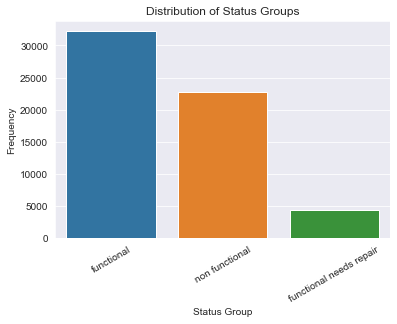

In [120]:
#plotting graph to show distribution of data
# Plot the histogram
sns.countplot(target['status_group'])

# Set the title
plt.title("Distribution of Status Groups")

# Add labels to the x and y axes
plt.xlabel("Status Group")
plt.ylabel("Frequency")

# Rotate the x-tick labels for readability
plt.xticks(rotation=30)

# Use Seaborn's default style
sns.set_style("darkgrid")

# Show the plot
plt.show();

> Lets is see this in numerical percentages.

In [121]:
target.status_group.value_counts()/len(target.status_group)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

> **54.31%** represent Functional Pumps, 
**38.42%** represent non-functional fumpus, 
**7.27%** represent functional but which needs to be repaired.

Thses percentages gives us a good chance for find the statistical values behind a certin pump. For example we have a 54.31% chance of picking a fully oparational pump.

NameError: name 'data' is not defined

#### Joining the dateframe for cleaning and EDA

In [65]:
training_data = pd.merge(features,target)

In [66]:
training_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


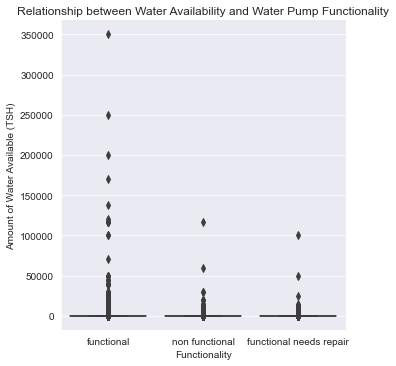

In [123]:
# Plot the relationship between water availability and water pump functionality
sns.catplot(x='status_group', y='amount_tsh', data=training_data, kind='box')
plt.title('Relationship between Water Availability and Water Pump Functionality')
plt.xlabel('Functionality')
plt.ylabel('Amount of Water Available (TSH)')
plt.show()

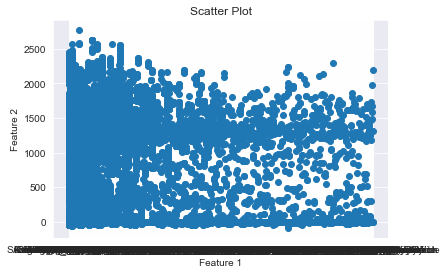

In [128]:

# Plot a scatter plot of two features
plt.scatter(training_data['funder'], training_data['gps_height'])

# Add a title and labels
plt.title("Scatter Plot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Show the plot
plt.show()

In [ ]:
# Plot the distribution of the target variable
target.value_counts().plot(kind='bar', color='blue')

# Add a title and labels
plt.title("Distribution of Target Variable")
plt.xlabel("Class")
plt.ylabel("Count")

# Show the plot
plt.show()

In [67]:
# check data types for numerical or categroical data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

> Dropping the columns with group since they seem to be haing the same values (duplicate columns) and some are irrelevant columns.

1. (extraction_type, extraction_type_group, extraction_type_class) 
2. (payment, payment_type)
3. (water_quality, quality_group) 
4. (source, source_class)
5. (subvillage, region, region_code, district_code, lga, ward) 
6. (waterpoint_type, waterpoint_type_group) 

In [68]:
training_data = training_data.drop(['id','source','wpt_name', 'num_private', 'region', 
          'quantity','quality_group','lga','ward','management', 'payment', 
           'extraction_type_group','extraction_type_class','recorded_by','waterpoint_type_group'],axis = 1)



In [69]:
training_data.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region_code,...,construction_year,extraction_type,management_group,payment_type,water_quality,quantity_group,source_type,source_class,waterpoint_type,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,11,...,1999,gravity,user-group,annually,soft,enough,spring,groundwater,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,20,...,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,21,...,2009,gravity,user-group,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,90,...,1986,submersible,user-group,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,non functional
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,18,...,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional


#### Checking for missing values

In [70]:
training_data.isna().sum()

amount_tsh               0
date_recorded            0
funder                3635
gps_height               0
installer             3655
longitude                0
latitude                 0
basin                    0
subvillage             371
region_code              0
district_code            0
population               0
public_meeting        3334
scheme_management     3877
scheme_name          28166
permit                3056
construction_year        0
extraction_type          0
management_group         0
payment_type             0
water_quality            0
quantity_group           0
source_type              0
source_class             0
waterpoint_type          0
status_group             0
dtype: int64

In [71]:
#### Dealing with missing values one by one

#### Funder

In [72]:
training_data.funder.value_counts().head(50)

Government Of Tanzania            9084
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
0                                  777
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                                442
Amref                              425
Fini Water               

In addition to the 3635 NaNs, there are 777 that have the entry “0”.
I’m assuming these are missing values too, so altogether we have 4412 missing values.


In [73]:
training_data['funder'] = training_data['funder'].fillna(0)# fill null with zero
training_data['funder'] = np.where(training_data['funder'] == 0, 0,training_data['funder'])
training_data['funder'] = np.where(training_data['funder'] == '0', 0,training_data['funder'])
training_data['funder'] = np.where(training_data['funder'] == 0, np.nan, training_data['funder'])# fill null with zero
training_data['funder'] = training_data['funder'].fillna(training_data['funder'].mode()[0])


In [74]:
training_data.funder.value_counts().head(50)

Government Of Tanzania            13496
Danida                             3114
Hesawa                             2202
Rwssp                              1374
World Bank                         1349
Kkkt                               1287
World Vision                       1246
Unicef                             1057
Tasaf                               877
District Council                    843
Dhv                                 829
Private Individual                  826
Dwsp                                811
Norad                               765
Germany Republi                     610
Tcrs                                602
Ministry Of Water                   590
Water                               583
Dwe                                 484
Netherlands                         470
Hifab                               450
Adb                                 448
Lga                                 442
Amref                               425
Fini Water                          393


#### Installer

In [75]:
training_data.installer.value_counts().head()

DWE           17402
Government     1825
RWE            1206
Commu          1060
DANIDA         1050
Name: installer, dtype: int64

In [76]:
training_data['installer'] = training_data['installer'].fillna(0)
training_data['installer'] = np.where(training_data['installer'] == 0, 0,training_data['installer'])
training_data['installer'] = np.where(training_data['installer'] == '0', 0,training_data['installer'])
training_data['installer'] = np.where(training_data['installer'] == 0, np.nan, training_data['installer'])
training_data['installer'] = training_data['installer'].fillna(training_data['installer'].mode()[0])


> In addition to the 3635 NaNs, there are 777 that have the entry “0”.
I’m assuming these are missing values too, so altogether we have 4412 missing values.


### subvillage 

In [77]:
training_data.subvillage.value_counts() 

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: subvillage, Length: 19287, dtype: int64

>I'm going to use mode for the missing values

In [78]:
training_data['subvillage'] = training_data['subvillage'].fillna(training_data['subvillage'].mode()[0])

#### scheme_management

In [79]:
training_data.scheme_management.value_counts() 

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [80]:
training_data.scheme_management.isna().value_counts()

False    55523
True      3877
Name: scheme_management, dtype: int64

In [81]:

training_data['scheme_management'] = training_data['scheme_management'].fillna(training_data['scheme_management'].mode()[0])

#### public_meeting 

In [82]:
training_data.public_meeting.value_counts() 

True     51011
False     5055
Name: public_meeting, dtype: int64

In [83]:

training_data['public_meeting'] = training_data['public_meeting'].fillna(training_data['public_meeting'].mode()[0])

#### scheme_name       

In [84]:
#let's drop the columns with 28k nans 
training_data= training_data.drop(columns='scheme_name')

>Drop the column since it has mor than 50% of missing data

#### permit

In [85]:
training_data['permit'] = training_data['permit'].fillna(training_data['permit'].mode()[0])


In [86]:
training_data.isna().sum()

amount_tsh           0
date_recorded        0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
subvillage           0
region_code          0
district_code        0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
management_group     0
payment_type         0
water_quality        0
quantity_group       0
source_type          0
source_class         0
waterpoint_type      0
status_group         0
dtype: int64

In [87]:
#checking the data types
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   date_recorded      59400 non-null  object 
 2   funder             59400 non-null  object 
 3   gps_height         59400 non-null  int64  
 4   installer          59400 non-null  object 
 5   longitude          59400 non-null  float64
 6   latitude           59400 non-null  float64
 7   basin              59400 non-null  object 
 8   subvillage         59400 non-null  object 
 9   region_code        59400 non-null  int64  
 10  district_code      59400 non-null  int64  
 11  population         59400 non-null  int64  
 12  public_meeting     59400 non-null  bool   
 13  scheme_management  59400 non-null  object 
 14  permit             59400 non-null  bool   
 15  construction_year  59400 non-null  int64  
 16  extraction_type    594

In [88]:
# removing duplicates
training_data.drop_duplicates(inplace=True)

In [89]:
## changing the construction year to numeric value
training_data.construction_year = pd.to_numeric(training_data.construction_year)

In [90]:
## Converting the Month column into date time object.
training_data['month']=pd.to_datetime(training_data.date_recorded).dt.month
training_data.date_recorded = pd.to_datetime(training_data.date_recorded)
training_data.date_recorded.describe()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_944\3750398453.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  training_data.date_recorded.describe()


count                   59257
unique                    356
top       2011-03-15 00:00:00
freq                      572
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

>let us try to add a new column named data_since_recorded (which is obtained from subratcting date_recorded from latest recorded date) so that we get a new column which contains no. of days since recorded. The most recent data is 2013-12-03. Subtract each date from this point to obtain a 'days_since_recorded' column.

In [91]:
training_data.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(training_data.date_recorded)
training_data.columns = ['days_since_recorded' if x=='date_recorded' else x for x in training_data.columns]
training_data.days_since_recorded = training_data.days_since_recorded.astype('timedelta64[D]').astype(int)
training_data.days_since_recorded.describe()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_944\2868931886.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  training_data.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(training_data.date_recorded)


count    59257.000000
mean       613.733264
std        334.383775
min          0.000000
25%        297.000000
50%        419.000000
75%        977.000000
max       4068.000000
Name: days_since_recorded, dtype: float64

In [92]:
# We can drop the location data, at this time I am not going to use location, maybe in future in I will also use this.
training_data = training_data.drop(['longitude', 'latitude', 'region_code', 'district_code','month'], axis=1)

In [93]:
training_data.columns

Index(['amount_tsh', 'days_since_recorded', 'funder', 'gps_height',
       'installer', 'basin', 'subvillage', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'management_group', 'payment_type', 'water_quality', 'quantity_group',
       'source_type', 'source_class', 'waterpoint_type', 'status_group'],
      dtype='object')

### TEST DATA

### As we did in the training data so we shall do the test data

In [94]:
test = test.drop(['longitude', 'latitude', 'region_code', 'district_code',
                  'num_private', 'id', 'payment', 'management', 
                  'extraction_type_class', 'extraction_type_group', 'recorded_by','region', 'lga',
                  'ward', 'wpt_name', 'quantity',
                 'quality_group', 'source'], axis=1)

In [95]:
test['funder'] = test['funder'].fillna(0)
test['funder'] = np.where(test['funder'] == 0, 0,test['funder'])
test['funder'] = np.where(test['funder'] == '0', 0,test['funder'])
test['funder'] = np.where(test['funder'] == 0, np.nan,test['funder'])
test['funder'] = test['funder'].fillna(test['funder'].mode()[0])


In [96]:
test['installer'] = test['installer'].fillna(0)
test['installer'] = np.where(test['installer'] == 0, 0,test['installer'])
test['installer'] = np.where(test['installer'] == '0', 0,test['installer'])
test['installer'] = np.where(test['installer'] == 0, np.nan, test['installer'])
test['installer'] = test['installer'].fillna(test['installer'].mode()[0])


In [97]:
test['subvillage'] = test['subvillage'].fillna(test['subvillage'].mode()[0])

In [98]:

test['scheme_management'] = test['scheme_management'].fillna(test['scheme_management'].mode()[0])

In [99]:

test['public_meeting'] = test['public_meeting'].fillna(test['public_meeting'].mode()[0])

In [100]:
test= test.drop(columns='scheme_name')

In [101]:
# removing duplicates
test.drop_duplicates(inplace=True)

In [102]:
## changing the construction year to numeric value
test.construction_year = pd.to_numeric(test.construction_year)

In [103]:
## Converting the Month column into date time object.
test['month']=pd.to_datetime(test.date_recorded).dt.month
test.date_recorded = pd.to_datetime(test.date_recorded)
test.date_recorded.describe()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_944\505023181.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  test.date_recorded.describe()


count                   14381
unique                    331
top       2013-02-03 00:00:00
freq                      138
first     2001-03-26 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [104]:
## Converting the Month column into date time object.
test['month']=pd.to_datetime(test.date_recorded).dt.month
test.date_recorded = pd.to_datetime(test.date_recorded)
test.date_recorded.describe()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_944\505023181.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  test.date_recorded.describe()


count                   14381
unique                    331
top       2013-02-03 00:00:00
freq                      138
first     2001-03-26 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [105]:
test.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(test.date_recorded)
test.columns = ['days_since_recorded' if x=='date_recorded' else x for x in test.columns]
test.days_since_recorded = test.days_since_recorded.astype('timedelta64[D]').astype(int)
test.days_since_recorded.describe()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_944\4201790042.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  test.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(test.date_recorded)


count    14381.000000
mean       611.714276
std        339.721112
min          0.000000
25%        297.000000
50%        417.000000
75%        979.000000
max       4635.000000
Name: days_since_recorded, dtype: float64

In [106]:
training_data.shape

(59257, 21)

In [107]:
test.shape

(14381, 22)

> Saving our data to a new file

In [108]:
training_data.to_csv('training_data.csv', index=True)


In [109]:
 
test.to_csv('test_data.csv', index=True)


In [110]:
test.columns


Index(['amount_tsh', 'days_since_recorded', 'funder', 'gps_height',
       'installer', 'basin', 'subvillage', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'management_group', 'payment_type', 'water_quality', 'quantity_group',
       'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'month'],
      dtype='object')

In [111]:
# importing the data(train and test)
training_data = pd.read_csv('training_data.csv')
test_data = pd.read_csv('test_data.csv')

training_data = training_data.drop('Unnamed: 0', axis=1)
test_data = test_data.drop('Unnamed: 0', axis=1)

# Viualization

In [112]:
x

NameError: name 'y_train' is not defined